In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
import matplotlib.pyplot as plt
import numpy as np
df = df[np.isfinite(df['MEDV'])]
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
print("Number of Rows of Data = " + str(len(df)) + '\n')
print("Number of Columns of Data = " + str(len(df.columns))) 
df.describe()


Number of Rows of Data = 506

Number of Columns of Data = 14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
y=np.array(df.MEDV)

Text(0,0.5,'Frequency')

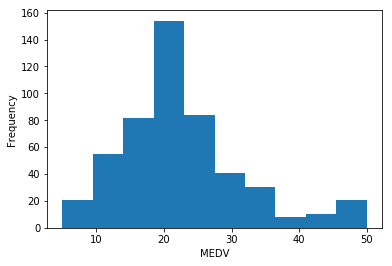

In [4]:
plt.hist(y)
plt.xlabel('MEDV')
plt.ylabel("Frequency")

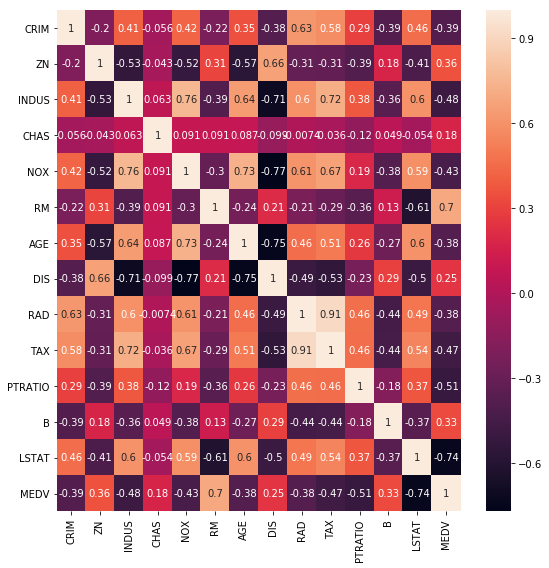

In [5]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr, annot=True)

plt.yticks(rotation=0); plt.xticks(rotation=90)
plt.tight_layout()

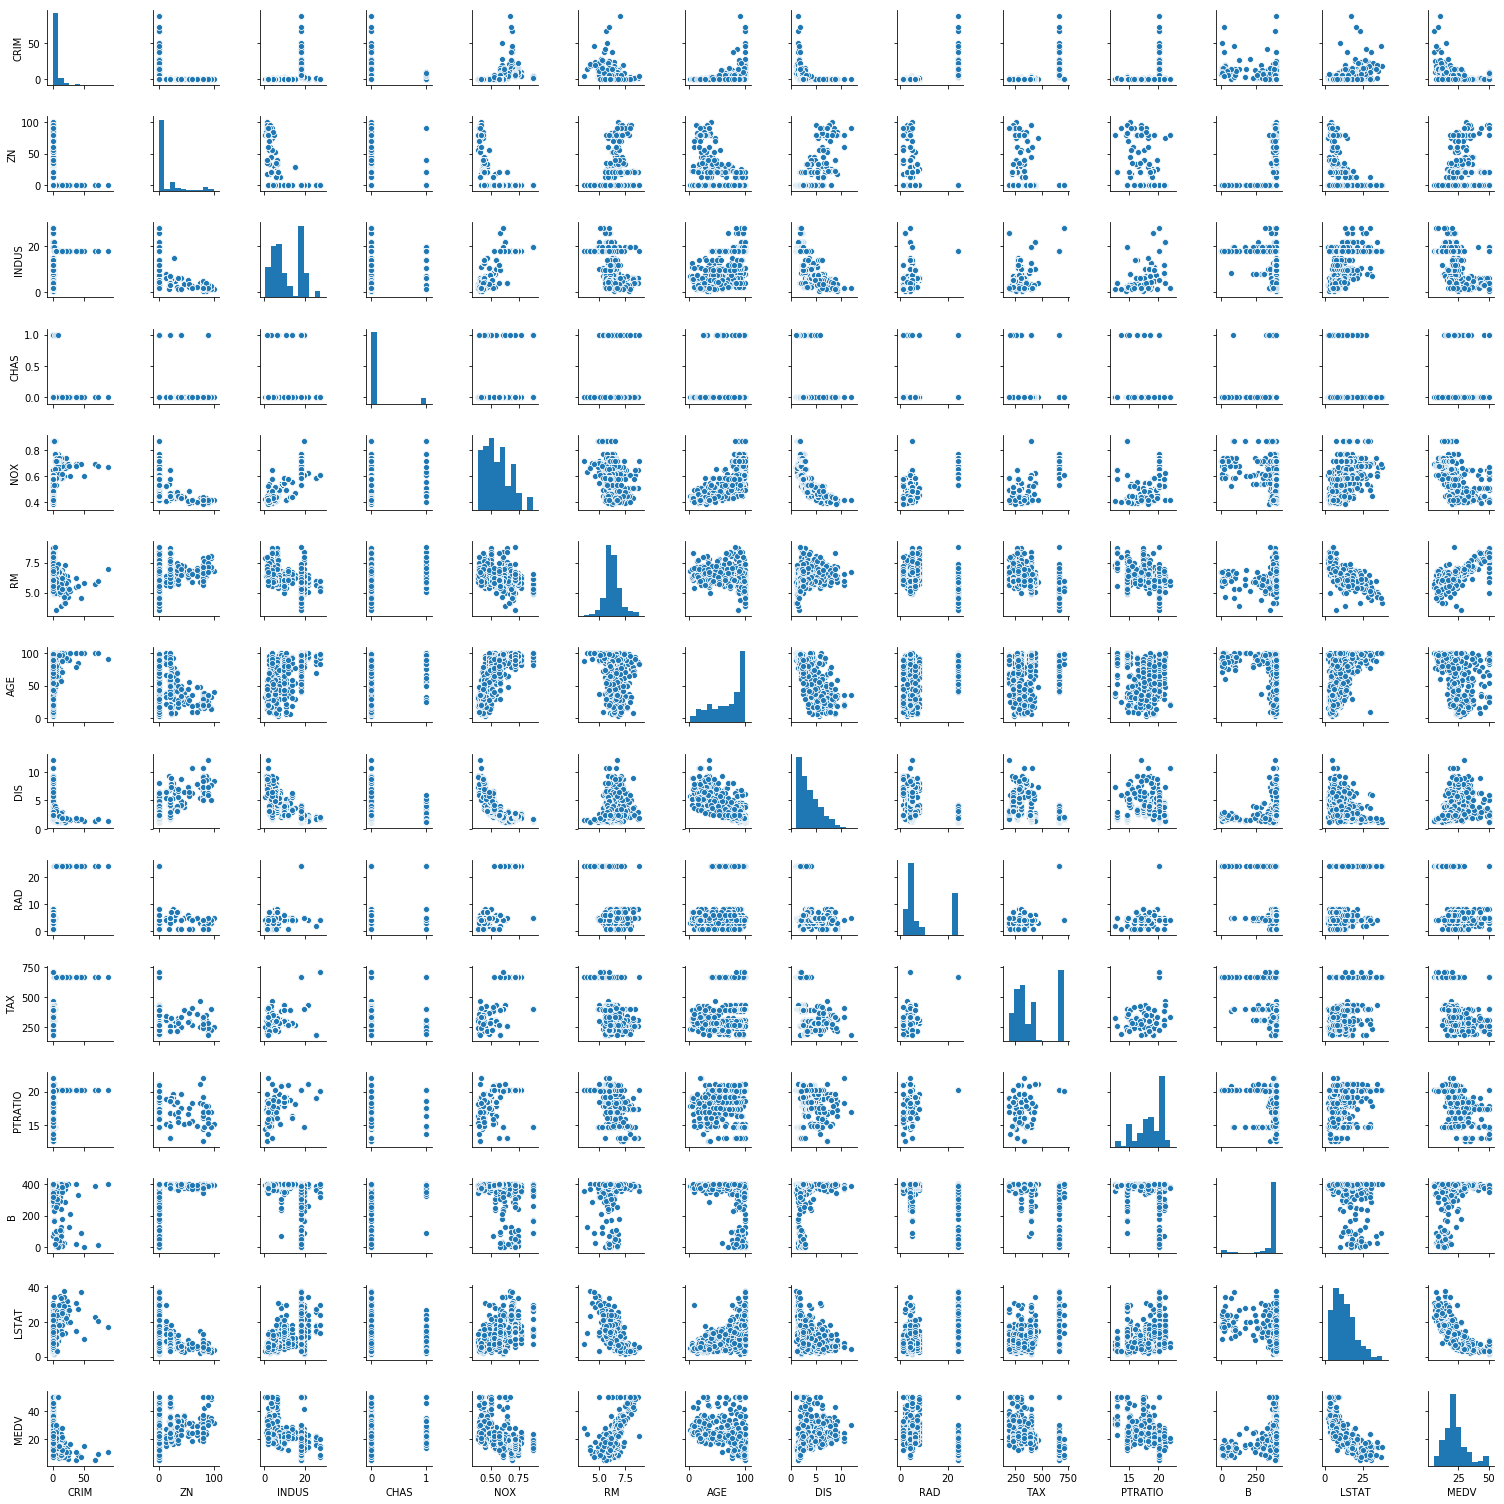

In [6]:
sns.pairplot(df, height=1.5)
plt.tight_layout()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("coefficients:")
print(lr.coef_)
print("y intecept:")
print(lr.intercept_ )

coefficients:
[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
y intecept:
30.246750993924017


Text(0.5,0,'Predicted values')

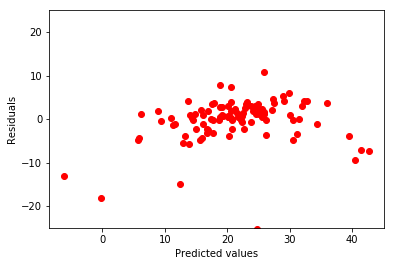

In [11]:
y_pred = lr.predict(X_test)
plt.scatter( y_pred,y_pred-y_test,c="red")
plt.ylim(-25,25)
plt.ylabel("Residuals")
plt.xlabel('Predicted values')

In [12]:

print("R^2: {}".format(lr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6687594935356298
Root Mean Squared Error: 4.928602182665353


In [13]:
df = pd.read_csv("/Users/qiuchenlu/Downloads/housing2.csv")
df = df[np.isfinite(df['MEDV'])]
X = df.iloc[:, :-1].values
y=np.array(df.MEDV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

Text(0,0.5,'MSE')

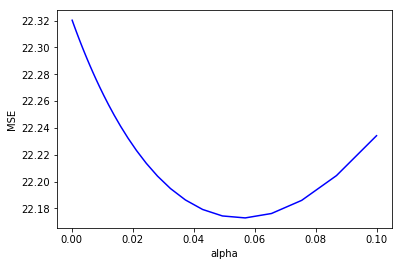

In [14]:
alpha_space = np.logspace(-4, -1, 50)
xplot=[]
yplot=[]
zplot=[]
for alpha in alpha_space:
    ridge = Ridge(alpha=alpha,normalize=True)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    xplot.append(alpha)
    yplot.append(mean_squared_error(y_test, y_pred))
    zplot.append(r2_score(y_test, y_pred))
plt.plot(xplot,yplot,c="blue")
plt.xlabel('alpha')
plt.ylabel('MSE')

Text(0,0.5,'R squared')

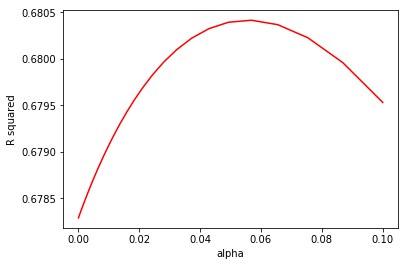

In [15]:
plt.plot(xplot,zplot,c="red")
plt.xlabel('alpha')
plt.ylabel('R squared')

1e-05
[ 2.25963222e+00 -2.94972774e-01  8.56575176e-01 -1.16854166e-02
 -2.95908757e-01 -8.40972349e-01 -1.14090934e-01 -7.71774527e-01
 -4.46754179e-01 -8.39703754e-01 -1.29038672e+00  1.15328551e+00
 -1.60798911e-01 -2.01041360e-01  3.40657512e-02  4.97888373e-02
  1.76987852e+00 -1.22223048e+01  5.42180984e+00 -2.32535159e-02
 -1.41466366e+00  2.53942452e-01 -9.90840396e-03 -8.60798420e-01
  1.36158700e-02 -4.59013395e-01]
1.2067926406393289e-05
[ 2.25948286e+00 -2.94870466e-01  8.56421030e-01 -1.16266568e-02
 -2.95814312e-01 -8.40779888e-01 -1.13767230e-01 -7.71621358e-01
 -4.46551280e-01 -8.39553093e-01 -1.29025223e+00  1.15314276e+00
 -1.60762480e-01 -2.00866996e-01  3.40575942e-02  4.97377991e-02
  1.76988593e+00 -1.22208175e+01  5.42179670e+00 -2.32498079e-02
 -1.41455674e+00  2.53839291e-01 -9.90504717e-03 -8.60767251e-01
  1.36157664e-02 -4.59024371e-01]
1.4563484775012445e-05
[ 2.25930186e+00 -2.94746157e-01  8.56236125e-01 -1.15543447e-02
 -2.95698803e-01 -8.40547233e-01 -1

Text(0,0.5,'MSE')

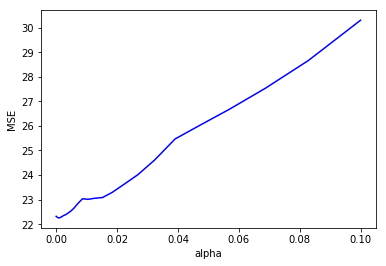

In [16]:
alpha_space = np.logspace(-5, -1, 50)
xplot=[]
yplot=[]
zplot=[]
for alpha in alpha_space:
    lasso = Lasso(alpha=alpha,normalize=True)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    xplot.append(alpha)
    yplot.append(mean_squared_error(y_test, y_pred))
    zplot.append(r2_score(y_test, y_pred))
    print(alpha)
    print(lasso.coef_)
plt.plot(xplot,yplot,c="blue")
plt.xlabel('alpha')
plt.ylabel('MSE')

Text(0,0.5,'R squared')

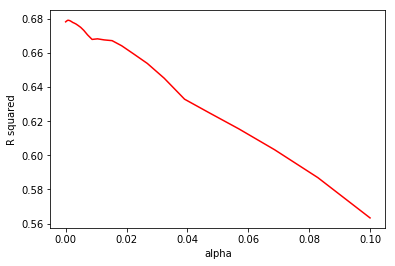

In [17]:
plt.plot(xplot,zplot,c="red")
plt.xlabel('alpha')
plt.ylabel('R squared')

In [18]:
print("If we simply use linear regression to fit the model with the data of no noise, we get a R_squared of 67%")
print("If we simply use ridge regression to fit the model with the data of additional 13 noises, we get a maximum R_squared of 68%")
print("If we simply use lasso regression to fit the model with the data of additional 13 noises, we can get rid of all of noises when we set the alpha=0.32 and get a R_squared of 65%")

If we simply use linear regression to fit the model with the data of no noise, we get a R_squared of 67%
If we simply use ridge regression to fit the model with the data of additional 13 noises, we get a maximum R_squared of 68%
If we simply use lasso regression to fit the model with the data of additional 13 noises, we can get rid of all of noises when we set the alpha=0.32 and get a R_squared of 65%


In [19]:
print("My name is Qiuchen LU")
print("My NetID is: QLU10")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Qiuchen LU
My NetID is: QLU10
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
